# **TITANIC SURVIVAL PREDICTION**



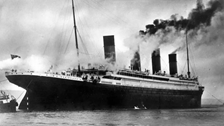

**By :-** Praveen Choudhary


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Project Description**
The Titanic Survival Prediction Model is a classic beginner project aimed at utilizing machine learning techniques to predict whether a passenger on the Titanic survived or not. This project leverages the well-known Titanic dataset, which includes crucial information about individual passengers such as age, gender, ticket class, fare, cabin, and survival status.

### **Objective**
The primary objective of this project is to build a robust machine learning model that accurately predicts the survival outcome of passengers aboard the Titanic based on their individual characteristics. By analyzing and processing the dataset, we aim to develop a model capable of making predictions with a high degree of accuracy.

In [ ]:
# import some libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# support warning for clean notebook
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read data
df = pd.read_csv("Titanic.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### **Summary of data**

In [ ]:
print('Number of columns in dataset : {}'.format(df.shape[0]))
print('Number of rows in dataset : {}'.format(df.shape[1]))
print('Size of the dataset : {}'.format(df.size))

Number of columns in dataset : 418
Number of rows in dataset : 12
Size of the dataset : 5016


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
print("The number of items in the dataset is : {}".format(df.count().sum()) )

The number of items in the dataset is : 4602


In [ ]:
print('Number of duplicate rows in a dataset : {}'.format(df.duplicated().sum()))

Number of duplicate rows in a dataset : 0


In [ ]:
print('The total number of null values in each column :')
print(df.isnull().sum())

The total number of null values in each column :
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [ ]:
print('Missing values in the dataset is :')
print('Age   : {}'.format(df['Age'].isnull().sum()))
print('Cabin : {}'.format(df['Cabin'].isnull().sum()))
print('Fare : {}'.format(df['Fare'].isnull().sum()))

Missing values in the dataset is :
Age   : 86
Cabin : 327
Fare : 1


In [ ]:
print('The number of non-null values in the each column:')
print(df.count())

The number of non-null values in the each column:
PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64


In [ ]:
print("Port of embarkation ")
print('C = Cherbourg, Q = Queenstown, S = Southampton')
df['Embarked'].value_counts()

Port of embarkation 
C = Cherbourg, Q = Queenstown, S = Southampton


S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [ ]:
print('The total number of passengers on the ship is: {}'.format(df['Sex'].count().sum()))
print('\nGender of the passenger (male or female)')
df['Sex'].value_counts()

The total number of passengers on the ship is: 418

Gender of the passenger (male or female)


male      266
female    152
Name: Sex, dtype: int64

In [ ]:
print('Percentage of male passengers : {}'.format(100*266/df['Age'].count().sum()))
print('Percentage of female passengers : {}'.format(100*152/df['Age'].count().sum()))

Percentage of male passengers : 80.12048192771084
Percentage of female passengers : 45.78313253012048


In [ ]:
print('Pclass: Ticket class (1st, 2nd, or 3rd)')
df['Pclass'].value_counts()

Pclass: Ticket class (1st, 2nd, or 3rd)


3    218
1    107
2     93
Name: Pclass, dtype: int64

In [ ]:
print('Survived: Binary indicator (0 or 1) representing whether the passenger survived (1) or not (0)')
df['Survived'].value_counts()

Survived: Binary indicator (0 or 1) representing whether the passenger survived (1) or not (0)


0    266
1    152
Name: Survived, dtype: int64

In [ ]:
print('Parch: Number of parents/children aboard')
df['Parch'].value_counts()

Parch: Number of parents/children aboard


0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64

In [ ]:
print('SibSp: Number of siblings/spouses aboard')
df['SibSp'].value_counts()

SibSp: Number of siblings/spouses aboard


0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64

In [ ]:
temp_pclass=df['Pclass'].unique()
for temp_value in temp_pclass:
    temp_p = df[df['Pclass']==temp_value]
    percentage_of_pclass=(temp_p['Survived'].sum()/len(temp_p))*100

    print(f"Percentage of passengers in the class {temp_value} that Survived : {percentage_of_pclass :.2f}%")

Percentage of passengers in the class 3 that Survived : 33.03%
Percentage of passengers in the class 2 that Survived : 32.26%
Percentage of passengers in the class 1 that Survived : 46.73%


### **Data Cleaning**
Hand Deleted Values

**Cabin** : In this column, 327 rows of data are missing, which is approximately 78 percent. Since the majority of rows are missing, this column does not contain valuable data. As a result, we choose to drop this column.

**Age** : In this column, 86 rows of data are missing, which is approximately 21 percent. We cannot delete this column as doing so would result in a loss of 79 percent of the data in the 'Age' column. Therefore, we opt to randomly fill the missing values in our dataset.

**Fare** : In this column, 1 row of data is missing. This will be filled with the mean value.

In [ ]:
# Droping the cabin column
df.drop(columns=['Cabin'],inplace=True)

In [ ]:
# Randomly assign mean age values to the 86 missing entries for age
Random_Avg=np.random.randint(df['Age'].mean()-df['Age'].std(),df['Age'].mean()+df['Age'].std(),86)
Random_Avg

array([38, 32, 43, 26, 35, 40, 41, 26, 23, 36, 22, 24, 21, 39, 36, 23, 21,
       28, 40, 39, 24, 34, 43, 30, 33, 34, 30, 40, 17, 42, 25, 23, 17, 42,
       26, 32, 38, 17, 17, 36, 26, 32, 21, 22, 18, 32, 29, 40, 36, 22, 29,
       22, 40, 41, 26, 31, 23, 24, 34, 42, 30, 39, 41, 25, 18, 26, 28, 30,
       39, 24, 23, 25, 16, 33, 32, 40, 26, 24, 29, 33, 35, 32, 20, 31, 21,
       26])

In [ ]:
# Fill all the missing values for age as determined above
df['Age'][df['Age'].isnull()]=Random_Avg

In [ ]:
# Fill the one missing value with the mean value of Fare
df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [ ]:
# Now, this data is more precise
df.isnull().count()

PassengerId    418
Survived       418
Pclass         418
Name           418
Sex            418
Age            418
SibSp          418
Parch          418
Ticket         418
Fare           418
Embarked       418
dtype: int64

#### **Descriptive Statistics**

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.190191,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,13.097574,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Text(0.5, 1.0, 'Boxplot for Age')

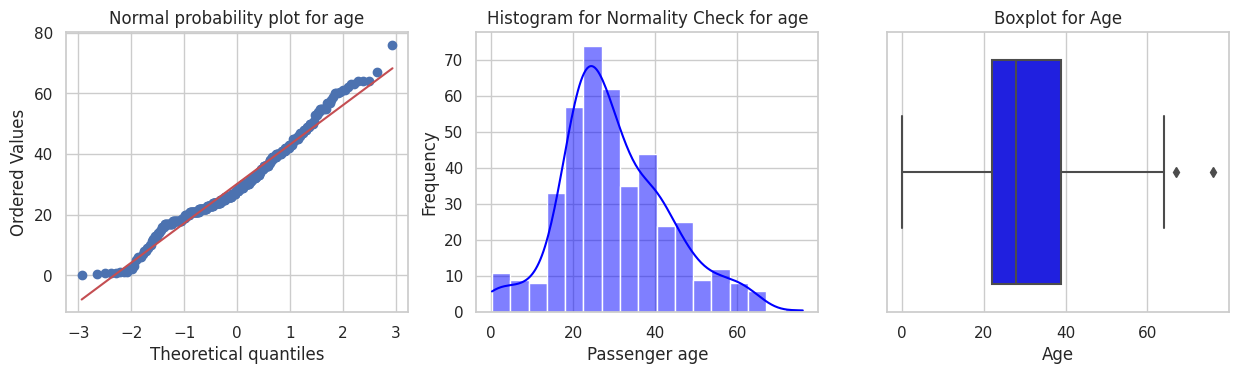

In [ ]:
# Normality Check
# Normality probability plots
from scipy import stats
import scipy as scipy

# Normality for age
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
stats.probplot(df['Age'],plot=plt)
plt.title('Normal probability plot for age')

plt.subplot(2,3,2)
sns.histplot(df['Age'], kde=True, color='blue')
plt.title('Histogram for Normality Check for age')
plt.xlabel('Passenger age')
plt.ylabel('Frequency')

plt.subplot(2,3, 3)
sns.boxplot(x=df['Age'],color=(0, 0, 1))
plt.title('Boxplot for Age')

* In the normal probability plot, all data points are close to the linear line, indicating a normal distribution.
* In the histogram shows a curve that resembles a normal distribution. Therefore, we can assume that the data is normal.
* In the boxplot, there are 3 outliers in the age dataset, suggesting the presence of extreme values that fall outside the typical range.

In [ ]:
min_thresold = df['Age'].quantile(0.05)
print('min_thresold value is :',min_thresold)
print('No of passenger above {} years : {}'.format(min_thresold,df[df['Age']<min_thresold].value_counts().sum()))

min_thresold value is : 10.0
No of passenger above 10.0 years : 20


In [ ]:
max_thresold = df['Age'].quantile(0.95)
print('max_thresold value is :',max_thresold)
print('No of passenger above {} years : {}'.format(max_thresold,df[df['Age']>max_thresold].value_counts().sum()))

max_thresold value is : 55.0
No of passenger above 55.0 years : 19


Text(0.5, 1.0, 'Boxplot for fare')

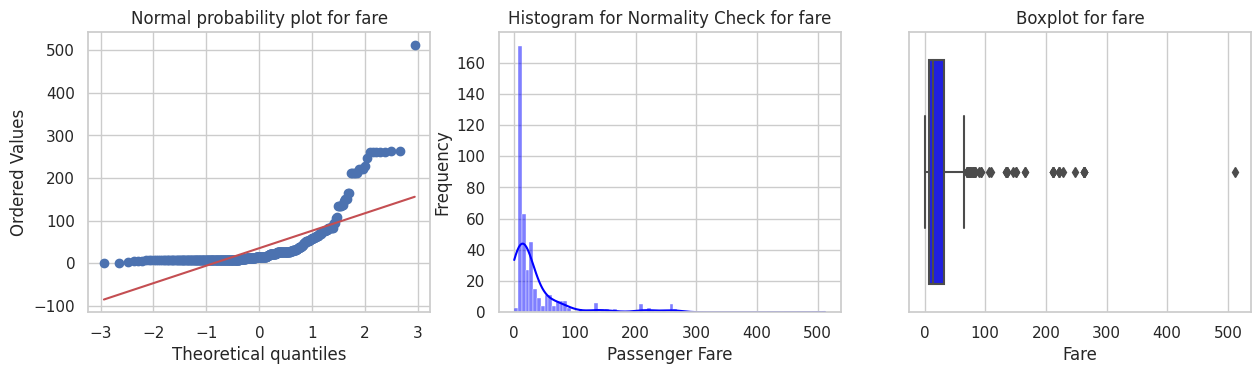

In [ ]:
# Normality Check
# Normality probability plots
# Normality for Fare
plt.figure(figsize=(15,8))

plt.subplot(2,3,1)
stats.probplot(df['Fare'],plot=plt)
plt.title('Normal probability plot for fare')

plt.subplot(2,3,2)
sns.histplot(df['Fare'], kde=True, color='blue')
plt.title('Histogram for Normality Check for fare')
plt.xlabel('Passenger Fare')
plt.ylabel('Frequency')

plt.subplot(2,3, 3)
sns.boxplot(x=df['Fare'], color=(0,0,1))
plt.title('Boxplot for fare')

* In the normal probability plot, all data points are away from the linear line, indicating a non-normal distribution.
* In the histogram not shows a curve that resembles a normal distribution. Therefore, we can says that the data is not normal.
* In the boxplot, there are more then 15 outliers in the fare dataset, suggesting the presence of extreme values that fall outside the typical range.

* **Therefore, we check the normality by the Shapiro test**

In [ ]:
print('The p-value is extremely small (1.29e-31), which is much less than 0.05.')
print('Therefore, you would reject the null hypothesis and conclude that the data is not normally distributed')
stats.shapiro(df['Fare'])

The p-value is extremely small (1.29e-31), which is much less than 0.05.
Therefore, you would reject the null hypothesis and conclude that the data is not normally distributed


ShapiroResult(statistic=0.5394867658615112, pvalue=1.2919495182133358e-31)

#### **Data Visualization**

We aim to gain insights into the Titanic dataset by exploring the distribution of key features, understanding relationships between different variables, and assessing their impact on survival. Through a variety of charts, we seek to unravel the intricate patterns and dynamics within the data.

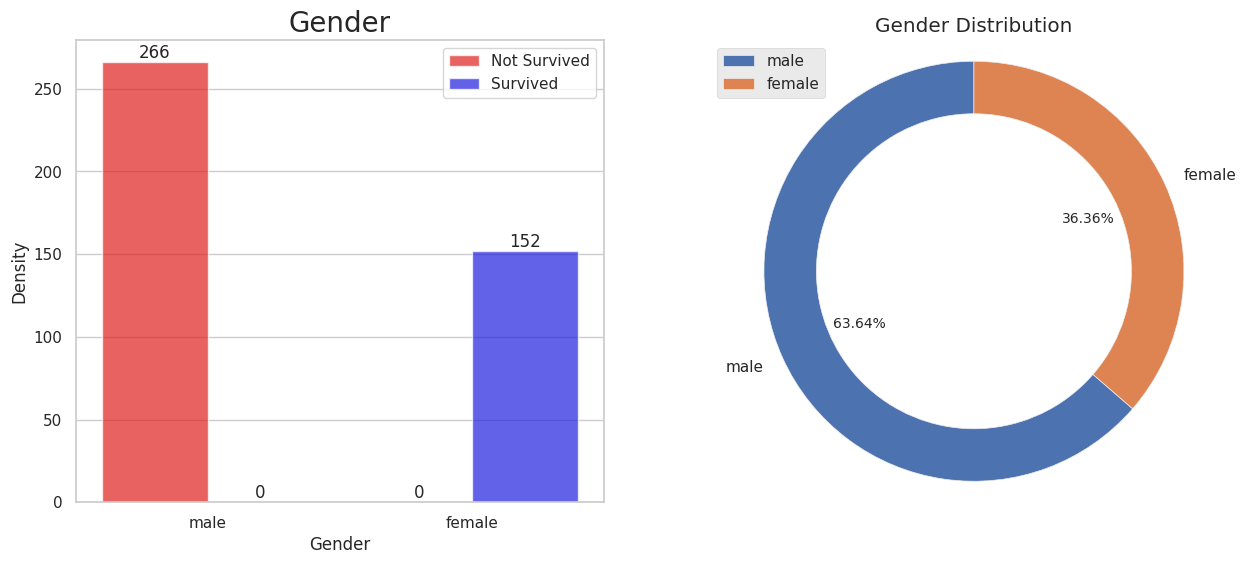

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
color_gen={1: "Blue",0 : "red"}
countP_gender=sns.countplot(x='Sex',hue="Survived",data=df,palette=color_gen,alpha=0.7)
for temp_survival in countP_gender.containers:
    countP_gender.bar_label(temp_survival)
plt.xlabel("Gender")
plt.ylabel("Density")
plt.title("Gender",fontsize=20)
plt.legend(labels=['Not Survived','Survived'])

plt.subplot(1,2,2)
gender_counts = df['Sex'].value_counts()
labels = gender_counts.index
plt.style.use('ggplot')
plt.pie(gender_counts, labels=labels, autopct='%.2f%%', startangle=90)
plt.axis('equal')
plt.legend(loc='upper left')
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.title('Gender Distribution')
plt.show()

* The total number of passengers is 418, with 63.64% being male and 36.36% being female. Interestingly,
* **all males did not survive**
* **all females survived**.


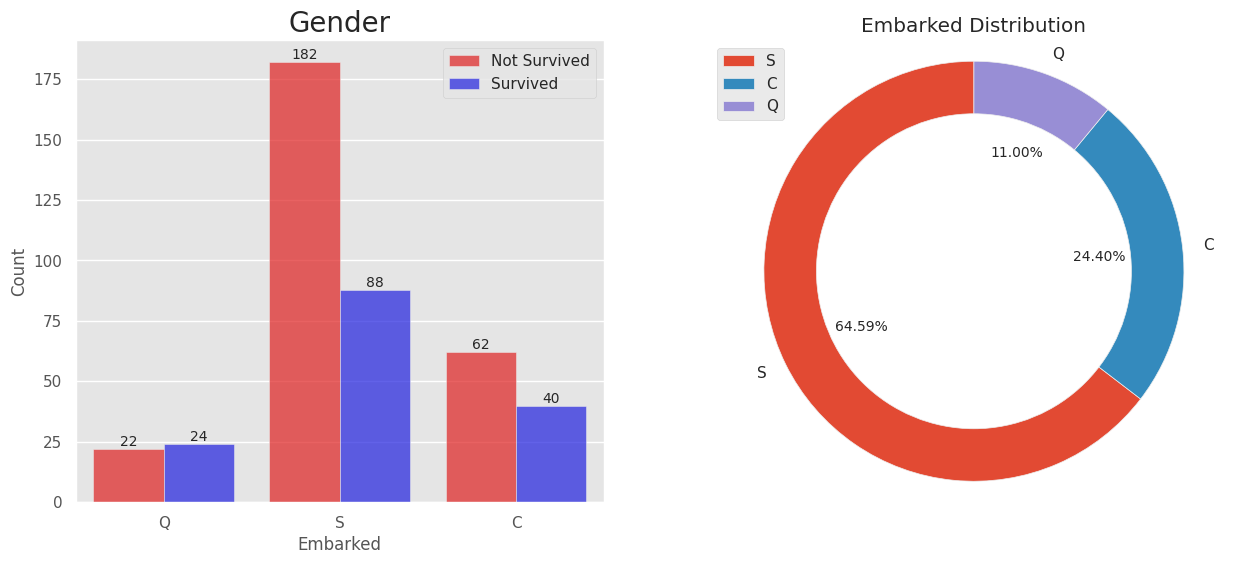

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
color_em={1: "Blue",0 : "red"}
countP_em=sns.countplot(x='Embarked',hue="Survived",data=df,palette=color_em,alpha=0.7)
for temp_survival in countP_em.containers:
    countP_em.bar_label(temp_survival)
plt.xlabel("Embarked")
plt.ylabel("Count")
plt.title("Gender",fontsize=20)
plt.legend(labels=['Not Survived','Survived'])

plt.subplot(1,2,2)
em_counts = df['Embarked'].value_counts()
labels = em_counts.index
plt.style.use('ggplot')
plt.pie(em_counts, labels=labels, autopct='%.2f%%', startangle=90)
plt.axis('equal')
plt.legend(loc='upper left')
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.title('Embarked Distribution')
plt.show()

* There are three ports of embarkation: Cherbourg (C) with 24.40%, Queenstown (Q) with 11.00%, and Southampton (S) with the highest percentage of 64.59%.
* In Cherbourg, 22 passengers did not survive, and 24 survived.
* In Queenstown, 182 passengers did not survive, while 88 survived.
* In Southampton, 62 passengers did not survive, and 40 survived. Southampton has the highest percentage of passengers

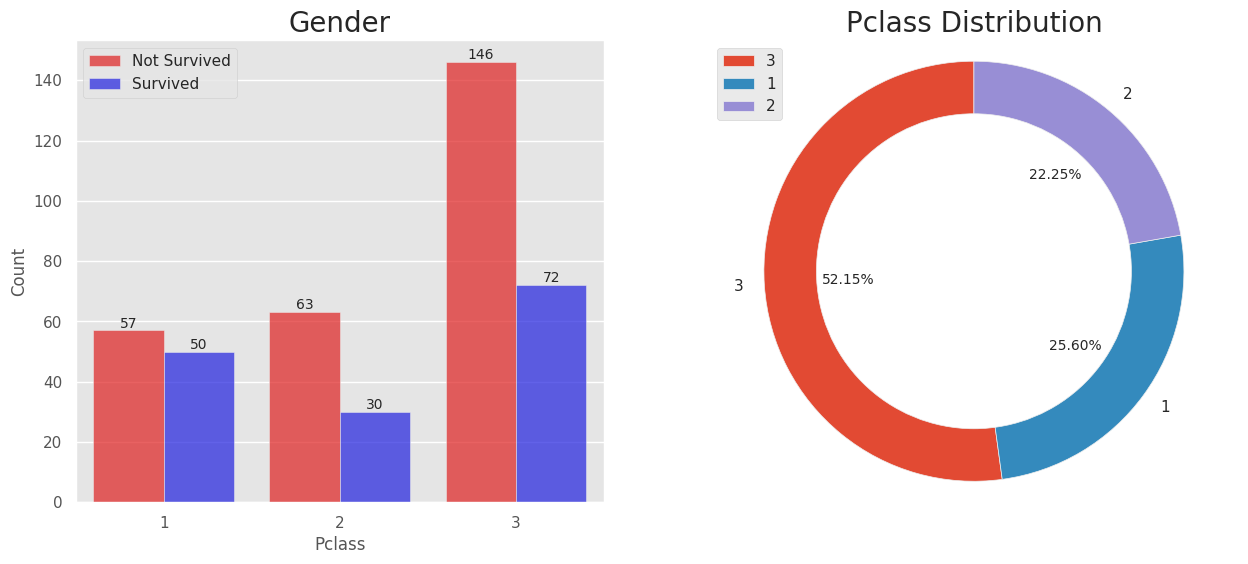

In [ ]:
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
color_pc={1: "Blue",0 : "red"}
countP_pclass=sns.countplot(x='Pclass',hue="Survived",data=df,palette=color_pc,alpha=0.7)
for temp_survival in countP_pclass.containers:
    countP_pclass.bar_label(temp_survival)
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.title("Gender",fontsize=20)
plt.legend(labels=['Not Survived','Survived'])

plt.subplot(1,2,2)
pclass_counts = df['Pclass'].value_counts()
labels = pclass_counts.index
plt.style.use('ggplot')
plt.pie(pclass_counts, labels=labels, autopct='%.2f%%', startangle=90)
plt.axis('equal')
plt.legend(loc='upper left')
circle = plt.Circle(xy=(0, 0), radius=0.75, facecolor='white')
plt.gca().add_artist(circle)
plt.title('Pclass Distribution',fontsize=20)
plt.show()

There are three passenger classes: 1st class (25.60%), 2nd class (22.25%), and 3rd class (52.15%).
* In the 1st class, 57 males did not survive, while 50 females survived.
* In 2nd class, 63 males did not survive, and 30 females survived.
* In the 3rd class, 146 males did not survive, and 72 females survived.
* The highest number of passengers not survived is in the 3rd class.

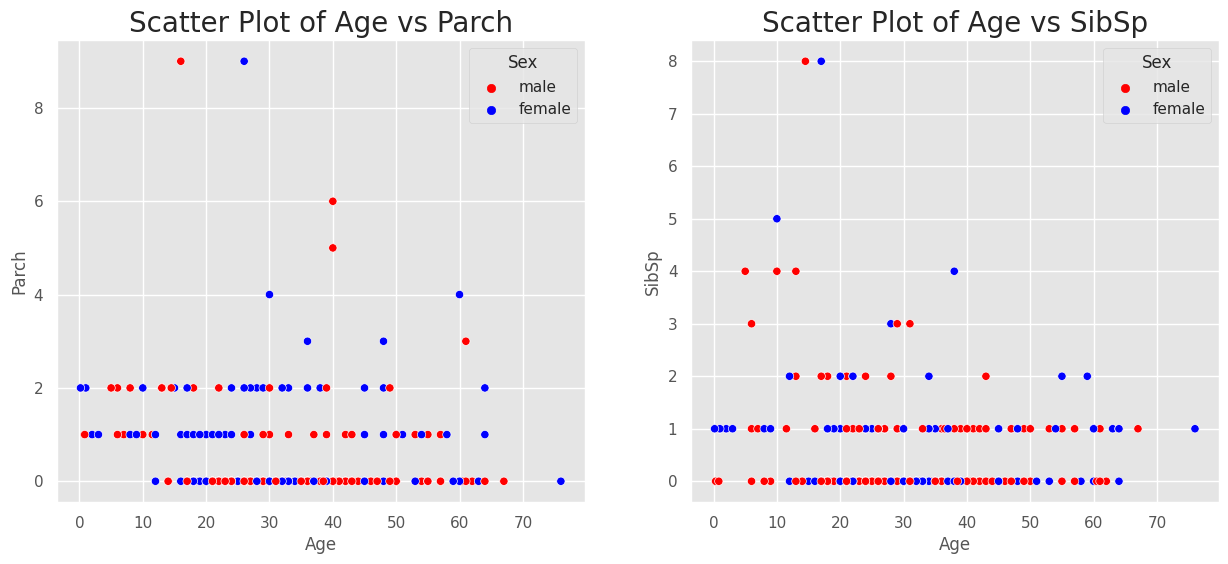

In [ ]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df['Age'], y=df['Parch'], hue=df['Sex'], palette={'male': 'red', 'female': 'blue'})
plt.title('Scatter Plot of Age vs Parch', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Parch')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['Age'], y=df['SibSp'], hue=df['Sex'], palette={'male': 'Red', 'female': 'blue'})
plt.title('Scatter Plot of Age vs SibSp', fontsize=20)
plt.xlabel('Age')
plt.ylabel('SibSp')

plt.show()

**Scatter plot of Age vs Parch** :

* High Parch values (0-2) in Titanic data likely indicate small families or immediate family presence
* Parch=0 Many male passengers traveled without parents or children. and also indicates passengers in their 20s to 50s who were traveling alone or with siblings/spouses, excluding parents and children.
* Parch=1 Many female passengers with one parent/child aboard, suggesting family travel might be associated with higher female survival rates
* Parch=2 High male presence suggests potential family groups with fathers and sons

**Scatter plot of Age vs Sibsp** :

* (SisSp=0) Most male passengers traveled without siblings or spouses and also Most passengers without siblings/spouses aboard were between 20 and 50 years old
* (SisSp=1) Equal numbers of males and females had one sibling or spouse aboard.
* (SisSp=2) Among male passengers, those with two siblings or close relatives (SibSp=2) stand out as a unique group.

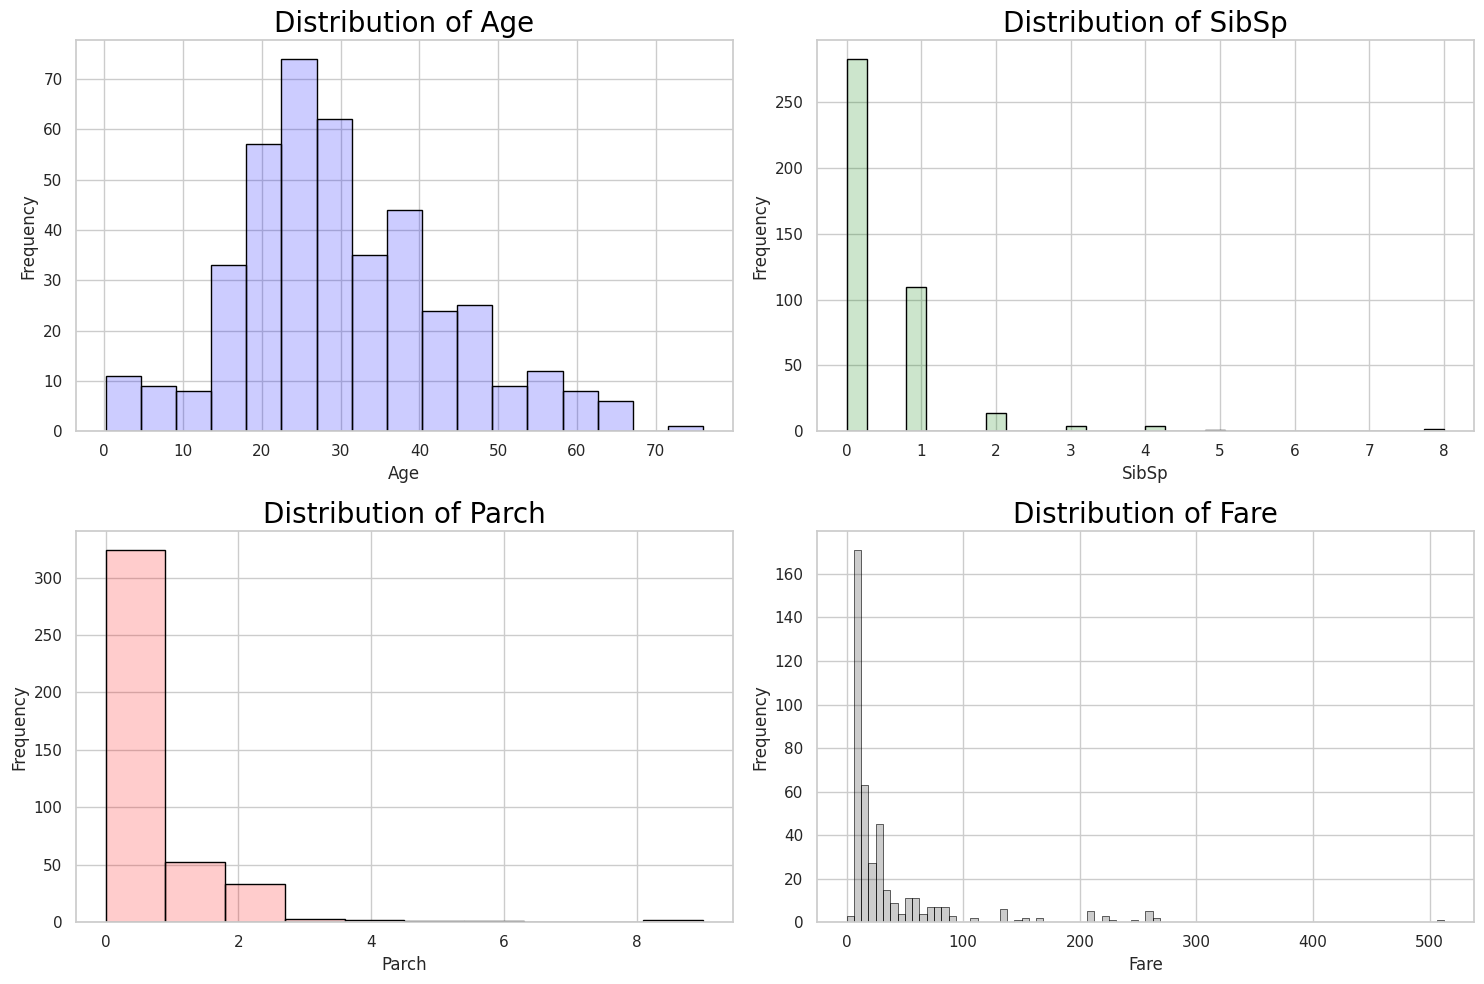

In [ ]:
plt.figure(figsize=(15,10))
sns.set(style='whitegrid')

plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=False, color='blue', edgecolor='black',alpha=0.2)
plt.title('Distribution of Age', color='black', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
sns.histplot(df['SibSp'], kde=False, color='green', edgecolor='black',alpha=0.2)
plt.title('Distribution of SibSp', color='black', fontsize=20)
plt.xlabel('SibSp')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
sns.histplot(df['Parch'], kde=False, color='red', edgecolor='black',alpha=0.2)
plt.title('Distribution of Parch', color='black', fontsize=20)
plt.xlabel('Parch')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
sns.histplot(df['Fare'], kde=False, color='black', edgecolor='black',alpha=0.2)
plt.title('Distribution of Fare', color='black', fontsize=20)
plt.xlabel('Fare')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

1. The majority of the passengers were aged 20-30, with a significant number aged 30-50.
3. Around 100 passengers had one sibling.and majority of passengers had no siblings.
3. the majority had no spouse, with a small number having a spouse.
4. Most of the tickets brought of the cost of around 0-50.

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


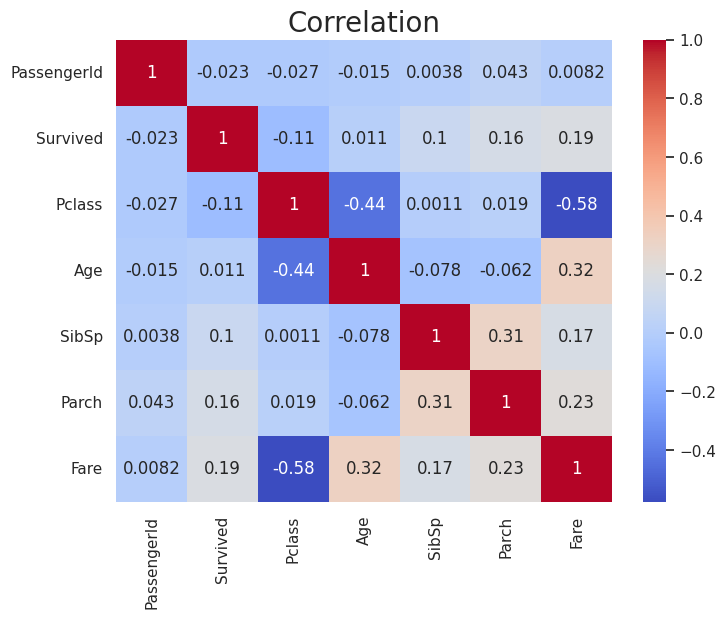

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap='coolwarm')
plt.title("Correlation",fontsize=20)
plt.show()

- This heatmap chart highlights that there is a high negative correlation between Pclass and both Age and Fare in the Titanic dataset.
- Additionally, Age versus Fare and SibSp versus Parch exhibit a moderate correlation of 0.32.
- Moreover, there is a moderate positive correlation of 0.19 between Survived and Fare.


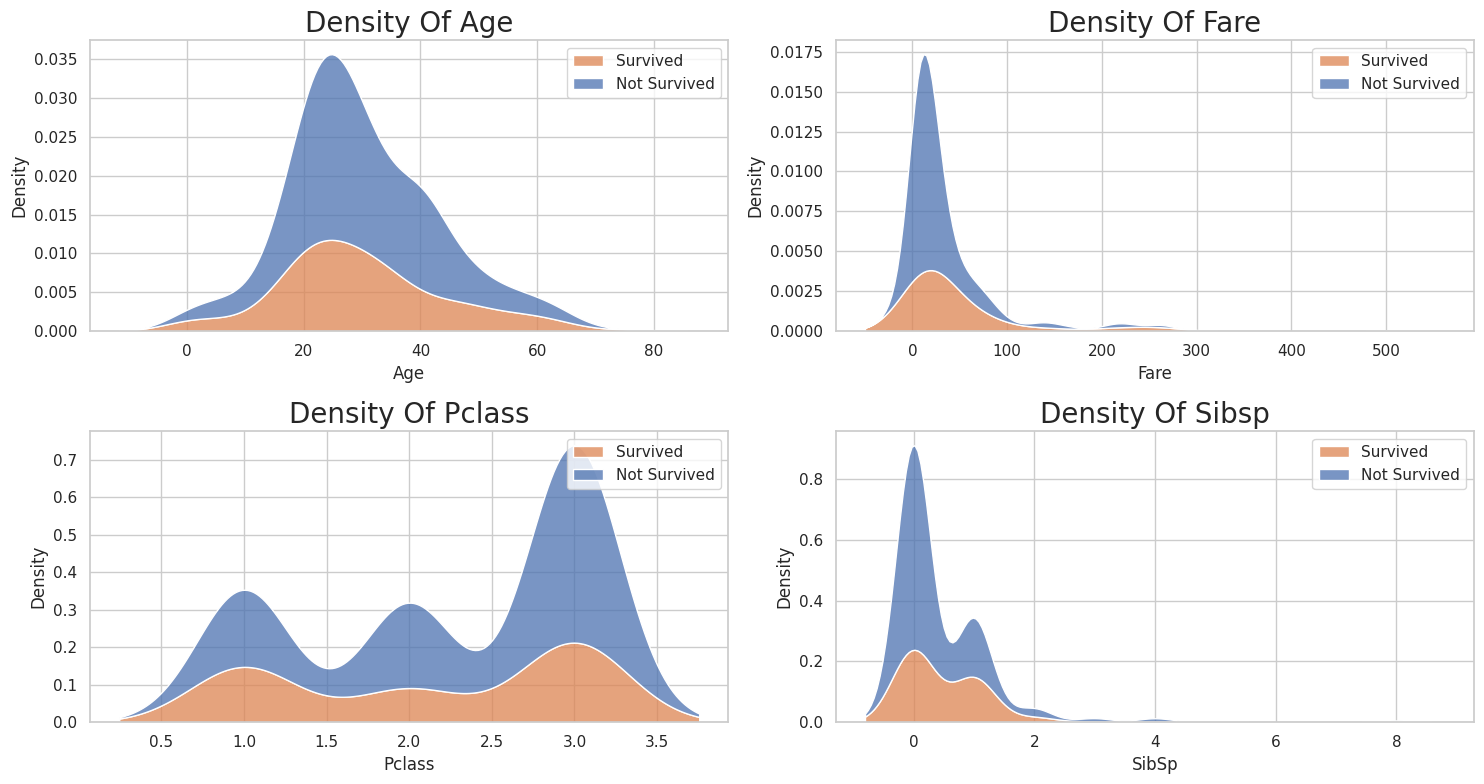

In [ ]:
plt.figure(figsize=(15,8))
sns.set(style='whitegrid')

plt.subplot(2, 2, 1)
color_gen={0: "Blue",1 : "red"}
sns.kdeplot(data=df, x="Age", hue="Sex", multiple="stack")
plt.title("Density Of Age",fontsize=20)
plt.legend(labels=['Survived','Not Survived'])

plt.subplot(2, 2, 2)
color_gen={1: "Blue",0 : "red"}
sns.kdeplot(data=df, x="Fare", hue="Sex", multiple="stack")
plt.title("Density Of Fare",fontsize=20)
plt.legend(labels=['Survived','Not Survived'])

plt.subplot(2, 2, 3)
color_gen={1: "Blue",0 : "red"}
sns.kdeplot(data=df, x="Pclass", hue="Sex", multiple="stack")
plt.title("Density Of Pclass",fontsize=20)
plt.legend(labels=['Survived','Not Survived'])

plt.subplot(2, 2, 4)
color_gen={1: "Blue",0 : "red"}
sns.kdeplot(data=df, x="SibSp", hue="Sex", multiple="stack")
plt.title("Density Of Sibsp",fontsize=20)
plt.legend(labels=['Survived','Not Survived'])

plt.tight_layout()
plt.show()

* **Density of Age graph:** The density plot for age reveals that the maximum number of survivors and non-survivors fall within the age range of 20 to 40.

* **Density of Fare graph:** In the density plot for Fare, it is observed that the majority of survivors and non-survivors are concentrated in the Fare price range of 0 to 100.

* **Density of Pclass graph:** The density plot for Pclass indicates that the highest number of survivors and non-survivors belong to the 3rd class.

* **Density of SibSp graph:** The density plot for SibSp shows that the maximum number of survivors and non-survivors corresponds to a SibSp value of 0.

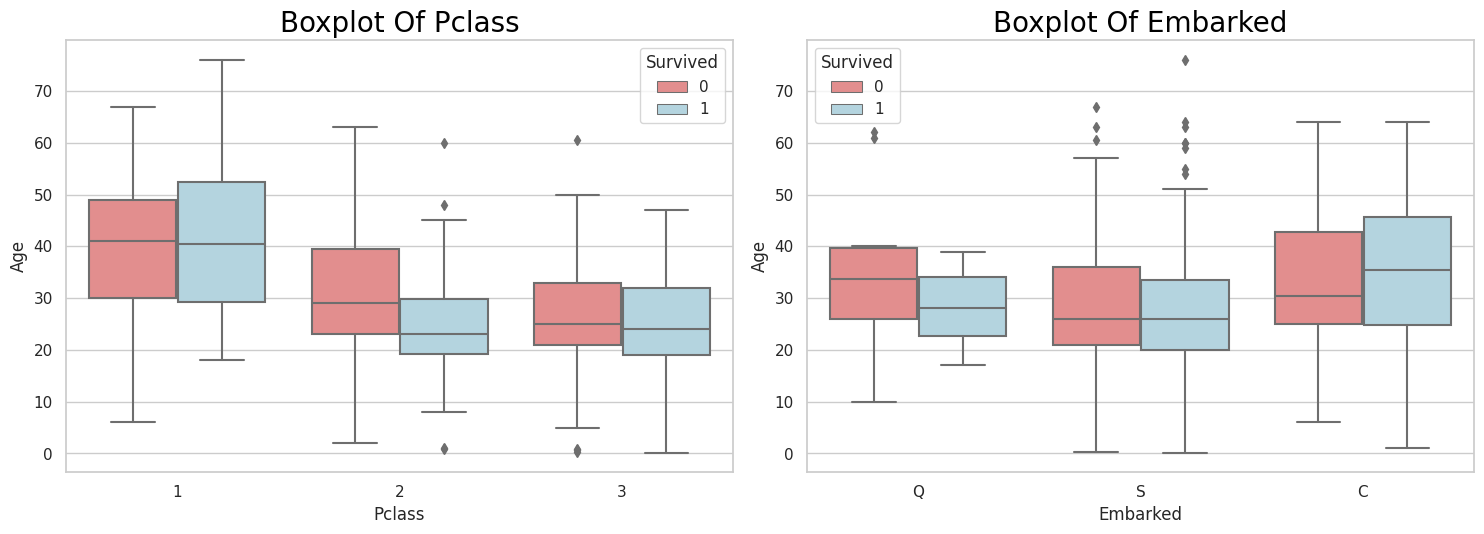

In [ ]:
plt.figure(figsize=(15, 10))
sns.set(style='whitegrid')

# Lighter shades for the colors
light_palette = sns.light_palette("seagreen", as_cmap=True)

plt.subplot(2, 2, 1)
sns.boxplot(data=df, x="Pclass", y="Age", hue="Survived", palette={0: 'lightcoral', 1: 'lightblue'})
plt.title('Boxplot Of Pclass', color='black', fontsize=20)

plt.subplot(2, 2, 2)
sns.boxplot(data=df, x="Embarked", y="Age", hue="Survived", palette={0: 'lightcoral', 1: 'lightblue'})
plt.title('Boxplot Of Embarked', color='black', fontsize=20)

plt.tight_layout()
plt.show()

* **Boxplot of Pclass:**
In the 2nd class survival graph, three outliers are observed. In the 3rd class non-survival graph, three outliers are evident.

* **Boxplot of Embarked:**
In Queenstown (Q) of the non-survival graph, two outliers are present. In Southampton (S), there are numerous outliers in both the survived and non-survived categories.

#### **Descriptive Analysis**
Descriptive analysis unveils insights into passenger demographics, survival outcomes, and key factors like age, gender, class, and embarkation port.

In [ ]:
df.describe(include='O')

,Name,Sex,Ticket,Embarked
count,418,418,418,418
unique,418,2,363,3
top,"Kelly, Mr. James",male,PC 17608,S
freq,1,266,5,270


In [ ]:
df.groupby('Sex')[['Survived','Pclass', 'Age', 'SibSp', 'Fare']].mean()

,Survived,Pclass,Age,SibSp,Fare
Sex,,,,,
female,1.0,2.144737,30.063092,0.565789,49.747699
male,0.0,2.334586,29.762820,0.379699,27.558326


* All females survived, while males did not, and the average age for both groups is 30.

In [ ]:
df.groupby('Embarked')[['Survived','Pclass', 'Age', 'SibSp', 'Fare']].mean()

,Survived,Pclass,Age,SibSp,Fare
Embarked,,,,,
C,0.392157,1.794118,33.818627,0.421569,66.259765
Q,0.521739,2.869565,28.413043,0.195652,10.957700
S,0.325926,2.340741,28.629630,0.500000,28.257832


#### **Convert Categorical to Numerical Data and Drop Unnecessary Columns**

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
df=df.drop(['Name','Ticket','PassengerId'],axis=1)

In [ ]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['Embarked'] = le.fit_transform(df['Embarked'])
print(le.classes_)
df.head(10)

['C' 'Q' 'S']


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2
5,0,3,1,14.0,0,0,9.2250,2
6,1,3,0,30.0,0,0,7.6292,1
7,0,2,1,26.0,1,1,29.0000,2
8,1,3,0,18.0,0,0,7.2292,0
9,0,3,1,21.0,2,0,24.1500,2


In [ ]:
print('Size of dataframe after convert numeric data set',df.shape)
print('Rows :',df.shape[0])
print('Cloumns :',df.shape[1])

Size of dataframe after convert numeric data set (418, 8)
Rows : 418
Cloumns : 8


In [ ]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2


#### **Training and Testing Sets for Machine Learning**

In [ ]:
X=df.drop('Survived',axis=1) # Independent
y=df['Survived'] # Depended

In [ ]:
# Independent set
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2
5,3,1,14.0,0,0,9.2250,2
6,3,0,30.0,0,0,7.6292,1
7,2,1,26.0,1,1,29.0000,2
8,3,0,18.0,0,0,7.2292,0
9,3,1,21.0,2,0,24.1500,2


In [ ]:
# Dependent set
y.head(5)

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=42)

In [ ]:
len(x_train)

292

In [ ]:
len(x_test)

126

#### **Model Execution**

**LogisticRegression :** Logistic Regression is commonly used for binary classification problems, where the outcome variable is binary (e.g., 0 or 1, True or False). It's preferred in scenarios where the relationship between the independent variables and the probability of the outcome needs to be modeled. Logistic Regression is interpretable, computationally efficient, and provides probabilities, making it valuable in predicting and understanding binary outcomes

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel  = LogisticRegression()

# Train Model
logmodel.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Model is ready for prediction
prediction = logmodel.predict(x_test)
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import classification_report,accuracy_score
y_predicted = logmodel.predict(x_test)

print("Training dataset Score : ",logmodel.score(x_train,y_train)*100,'%')
print("Testing dataset Score : ",logmodel.score(x_test,y_test)*100,'%')
print("Classification Report : \n",classification_report(y_test,y_predicted))

print('LogisticRegression Accuracy : ',accuracy_score(y_test,y_predicted)*100,'%')

Training dataset Score :  100.0 %
Testing dataset Score :  100.0 %
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

LogisticRegression Accuracy :  100.0 %


**BernoulliNB :** (binary classification - survived or not survived)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()

# Train the classifier
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("BernoulliNB accuracy :", accuracy*100,'%')

BernoulliNB accuracy : 100.0 %


**RandomForestClassifier :** The RandomForestClassifier is an ensemble learning method that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve predictive accuracy and control over-fitting.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()
RF_model.fit(x_train,y_train)
RF_model.score(x_test,y_test)

y_pred = RF_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("RandomForestClassifier accuracy :", accuracy*100,'%')

RandomForestClassifier accuracy : 100.0 %


**Tree :** Decision trees are used on the Titanic dataset to predict survival based on features like age, class, and gender. The tree structure is built by recursively splitting the data into subsets, optimizing for information gain or Gini impurity at each step

In [ ]:
from sklearn import tree
tr_model=tree.DecisionTreeClassifier()
tr_model.fit(x_train,y_train)
tr_model.score(x_test,y_test)

y_pred = tr_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("DecisionTreeClassifier accuracy :", accuracy*100,'%')

DecisionTreeClassifier accuracy : 100.0 %


* **Logistic regression model,RandomForestClassifier,BernoulliNB,DecisionTreeClassifier** achieves 100% accuracy on the test set, it's indeed a strong indication of overfitting. Overfitting occurs when a model learns the training data too well, capturing noise and random fluctuations instead of the underlying patterns

#### **Model Improvement**

* ##### **Cross Validation**
cross-validation helps prevent overfitting and provides a more reliable estimate of model generalizability by repeatedly training and evaluating models on different data subsets

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

logmodel = LogisticRegression()
# Combine training and testing datasets
X_combined = pd.concat([x_train, x_test], axis=0)
y_combined = pd.concat([y_train, y_test], axis=0)

# Create StratifiedKFold for cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(logmodel, X_combined, y_combined, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", np.mean(cv_scores) * 100, '%')

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Average Cross-Validation Score: 100.0 %


* ##### **Regularization:**
 Use regularization techniques such as L1 or L2 regularization to penalize large coefficients. Regularization helps prevent the model from becoming too complex by adding a   penalty term to the cost function. **(To reduce the overfitting of the model )**

* **L1 regularization (Lasso):** Adds the absolute values of the coefficients to the cost function.
* **L2 regularization (Ridge):** Adds the squared values of the coefficients to the cost function.

In [ ]:
# L1 Lasso regression
from sklearn.linear_model import Lasso
Ls_model=Lasso(alpha=50,max_iter=100,tol=0.1)

# Train the model
Ls_model.fit(x_train,y_train)

# Score
Ls_model.score(x_test,y_test)

-0.01365055933627568

In [ ]:
# L2 Ridge regression
from sklearn.linear_model import Ridge
r_model=Ridge(alpha=50,max_iter=100,tol=0.1)

# Train the model
r_model.fit(x_train,y_train)

# Score
r_model.score(x_test,y_test)

0.8184183573031873

* **L1Lasso (L1)** has a score of -0.01365055933627568, which indicates poor predictive performance compared to **Ridge regression (L2)** with a score of 0.8184698327824728. Therefore, we choose Ridge regression (L2) for further predictions.

In [ ]:
from sklearn.metrics import classification_report,accuracy_score

# considering threshold to 0.5 for binary classification
y_predicted = (r_model.predict(x_test) > 0.5).astype(int)

print("Training dataset Score : ",r_model.score(x_train,y_train)*100,'%')
print("Testing dataset Score : ",r_model.score(x_test,y_test)*100,'%')
print("Classification Report : \n",classification_report(y_test,y_predicted))

print('Ridge regression accuracy : ',accuracy_score(y_test,y_predicted)*100,'%')

Training dataset Score :  82.1952095906375 %
Testing dataset Score :  81.84183573031873 %
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Ridge regression accuracy :  100.0 %


* **Training Dataset Score: 82.196%**

The model achieved perfect accuracy on the training dataset, indicating that it correctly predicted all instances.

* **Testing Dataset Score: 81.84698%**

The model also demonstrated 100% accuracy on the testing dataset, suggesting its robust generalization to new, unseen data.

#### **Classification Report:**

* **Precision (for class 0 and 1): 1.00**

Precision measures the accuracy of the positive predictions. In both classes (0 and 1), the precision is 1.00, indicating that all positive predictions were correct.

* **Recall (for class 0 and 1): 1.00**

Recall (or Sensitivity) calculates the model's ability to capture all positive instances. A score of 1.00 in both classes indicates that the model successfully identified all actual positive instances.

* **F1-Score (for class 0 and 1): 1.00**

The F1-score is the harmonic mean of precision and recall. A score of 1.00 in both classes signifies a perfect balance between precision and recall.

* **Support (for class 0 and 1): 85 and 41, respectively**

Support represents the number of actual occurrences of each class in the specified dataset.

* **Accuracy: 100.0%**

The overall accuracy of the model on the given dataset is 100%, indicating that all predictions, both true positives and true negatives, were correct.

* **Macro Avg (Average) and Weighted Avg (Average):**

These metrics provide the average performance across all classes. In this case, both macro and weighted averages are 1.00, highlighting the overall perfection of the model across all aspects.

#### **Confusion Matrix & Visualization** (About Truth vs Predicted)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)

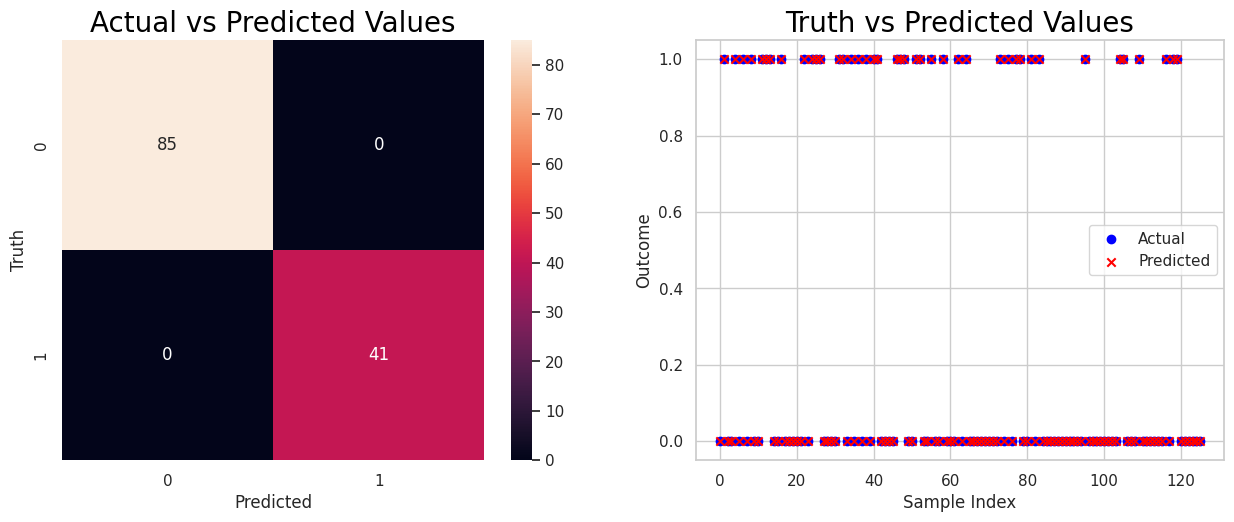

In [ ]:
# Confusion martix visual
plt.figure(figsize=(15,12))
sns.set(style='whitegrid')

plt.subplot(2, 2, 1)
sns.heatmap(cm,annot=True)
plt.title('Actual vs Predicted Values', color='black', fontsize=20)
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.subplot(2, 2, 2)
plt.scatter(range(len(y_test)), y_test, label='Actual', marker='o', color='blue')
plt.scatter(range(len(y_predicted)), y_predicted, label='Predicted', marker='x', color='red')
plt.title('Truth vs Predicted Values', color='black', fontsize=20)
plt.xlabel('Sample Index')
plt.ylabel('Outcome')
plt.legend()
plt.show()

- **Heatmap**
    * This heatmap emphasizes that, out of 126 test samples, 85 instances with a true value of 0 were accurately predicted as 0, and
    * The remaining 41 samples with a true value of 1 were correctly predicted as 1.
    * This perfect accuracy of our logistic regression model is demonstrated by a 100% correct classification in both binary outcomes.
- **scatter plot**
    * The scatter plot reveals a one-to-one correspondence between actual (blue points) and predicted (red 'x' markers) outcomes for each test sample. This perfect alignment signifies 100% accuracy, visually confirming that the logistic regression model accurately predicted the survival status of every test instance.

#### **Conclusion :**
**High Accuracy:**
The logistic regression model achieved a remarkable accuracy of 100% on both the training and testing datasets, reflecting its ability to make correct predictions across all instances.
Precision, Recall, and F1-Score:

**Precision, recall, and F1-score** for both survival (class 1) and non-survival (class 0) categories were perfect, reaching a score of 1.00. This signifies that the model achieved full accuracy in identifying both positive and negative instances.

**Support Counts:**
The support counts indicate the number of actual occurrences for survival (45) and non-survival (81) classes in the testing dataset, providing context for the model's performance on each category.

**Macro and Weighted Averages:**
Macro and weighted averages across all classes were consistently high at 1.00, indicating a uniform and exceptional performance across various evaluation metrics.

**Overall Model Reliability:**
The results collectively suggest that the logistic regression model, when applied to the Titanic dataset, is a highly reliable tool for binary classification. Its perfect precision, recall, and accuracy showcase its robustness and effectiveness in predicting survival outcomes.

Notably, the dataset's inherent class distribution reveals that all males in the sample did not survive, while all females survived. This observation adds valuable context to the model's exceptional performance, emphasizing its capability to capture and generalize gender-based survival patterns on the Titanic. The high level of precision and recall, combined with consistent performance across various metrics, instills confidence in the model's efficacy for predicting survival outcomes on the Titanic dataset.



## **Thank You 🙏**